<a href="https://colab.research.google.com/github/BD-David1108/AI_Projects/blob/main/Deep_Learning_Regression_with_Admissions_Data_f_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [46]:
# Loading and checking the data
dataset = pd.read_csv('/content/drive/MyDrive/data/admissions_data.csv')
print(dataset.head())
print(dataset.columns)
print(dataset.shape)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
(500, 9)


In [47]:
# Feature and label data split
labels = dataset.iloc[:, -1]
features = dataset.iloc[:, 1:-1]

In [48]:
# Train, validation, test split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=11)
features_train, features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.20, random_state=42)

In [49]:
# StandardScaler for feature scaling
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)
features_val_scaled = scaler.transform(features_val)


In [50]:
# Creating the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(features.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                256       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [51]:
# Compiling model
model.compile(loss='mse', metrics=['mae'], optimizer='adam')

In [52]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True)

In [53]:
# Fitting the model
history = model.fit(features_train_scaled, labels_train, epochs=150, batch_size=32,
                    validation_data=(features_val_scaled, labels_val), callbacks=[early_stopping])

Epoch 1/150
10/10 [==============================] - 1s 31ms/step - loss: 0.6211 - mae: 0.7649 - val_loss: 0.3630 - val_mae: 0.5799
Epoch 2/150
10/10 [==============================] - 0s 10ms/step - loss: 0.2533 - mae: 0.4721 - val_loss: 0.1383 - val_mae: 0.3339
Epoch 3/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0934 - mae: 0.2614 - val_loss: 0.0698 - val_mae: 0.2234
Epoch 4/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0553 - mae: 0.1960 - val_loss: 0.0653 - val_mae: 0.2136
Epoch 5/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0510 - mae: 0.1878 - val_loss: 0.0567 - val_mae: 0.1977
Epoch 6/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0410 - mae: 0.1690 - val_loss: 0.0488 - val_mae: 0.1831
Epoch 7/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0369 - mae: 0.1594 - val_loss: 0.0444 - val_mae: 0.1748
Epoch 8/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0

In [54]:
# Evaluate the model on test set
loss, mae = model.evaluate(features_test_scaled, labels_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

4/4 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0506
Test Loss: 0.004327877890318632, Test MAE: 0.05063465237617493


In [55]:
# Predict admission scores
predicted_values = model.predict(features_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [56]:
# Calculate R-squared
r_squared = r2_score(labels_test, predicted_values)
print("R-squared:", r_squared)

R-squared: 0.7977524297819385


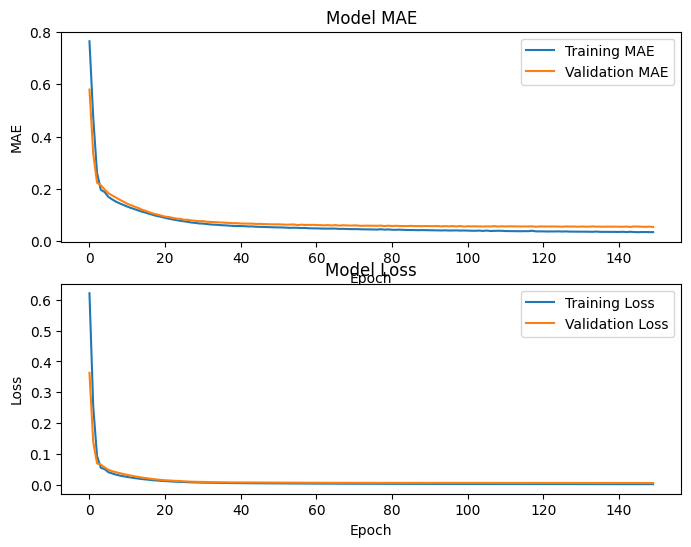

In [57]:
# Plotting the model metrics
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()